**QUESTION 1**

In [ ]:
!pip install dmba

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from dmba import classificationSummary

Colab environment detected.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
loan_df= pd.read_csv("loan.csv")

In [ ]:
print(loan_df.shape)

(614, 13)


In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
loan_df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,float64
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
#Changing object variables to categorical

for col in ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    loan_df[col] = loan_df[col].astype('category')

In [ ]:
loan_df.dtypes

,0
Loan_ID,category
Gender,category
Married,category
Dependents,float64
Education,category
Self_Employed,category
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
#Changing categorical variables to integers

loan_df['Loan_ID'] = loan_df['Loan_ID'].cat.codes
loan_df['Gender'] = loan_df['Gender'].cat.codes
loan_df['Married'] = loan_df['Married'].cat.codes
loan_df['Education'] = loan_df['Education'].cat.codes
loan_df['Self_Employed'] = loan_df['Self_Employed'].cat.codes
loan_df['Property_Area'] = loan_df['Property_Area'].cat.codes
loan_df['Loan_Status'] = loan_df['Loan_Status'].cat.codes

In [ ]:
loan_df.dtypes

,0
Loan_ID,int16
Gender,int8
Married,int8
Dependents,float64
Education,int8
Self_Employed,int8
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
loan_df.isnull().any().any()

np.True_

In [ ]:
loan_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
loan_df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1.0,0,0,4583,1508.000000,128.0,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.000000,66.0,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.000000,120.0,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.000000,141.0,360.0,1.0,2,1
5,5,1,1,2.0,0,1,5417,4196.000000,267.0,360.0,1.0,2,1
6,6,1,1,0.0,1,0,2333,1516.000000,95.0,360.0,1.0,2,1
7,7,1,1,3.0,0,0,3036,2504.000000,158.0,360.0,0.0,1,0
8,8,1,1,2.0,0,0,4006,1526.000000,168.0,360.0,1.0,2,1
9,9,1,1,1.0,0,0,12841,10968.000000,349.0,360.0,1.0,1,0
10,10,1,1,2.0,0,0,3200,700.000000,70.0,360.0,1.0,2,1


In [ ]:
#Dropping any missing values

loan_df.dropna(inplace=True)

In [ ]:
loan_df.isnull().any().any()

np.False_

In [ ]:
#Splitting the dataset into training and test sets using the 80/20 rule

y = loan_df['Loan_Status']
X = loan_df.drop(columns=['Loan_Status'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#Running a Regression Model

LogR = LogisticRegression()
LogR.fit(train_X, train_y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Regression Coefficients

print('intercept ', LogR.intercept_[0])
print(pd.DataFrame({'coeff': LogR.coef_[0]}, index=X.columns).transpose())

intercept  0.08919916892349557
       Loan_ID    Gender   Married  Dependents  Education  Self_Employed  \
coeff  0.00043  0.313217  0.343232    0.346504  -0.140393      -0.193205   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
coeff         0.000015          -0.000074   -0.000194         -0.003805   

       Credit_History  Property_Area  
coeff        1.345271       0.323558  


In [ ]:
classificationSummary(train_y, LogR.predict(train_X))

Confusion Matrix (Accuracy 0.7700)

       Prediction
Actual   0   1
     0  34  90
     1   5 284


In [ ]:
classificationSummary(test_y, LogR.predict(test_X))

Confusion Matrix (Accuracy 0.7885)

       Prediction
Actual  0  1
     0 11 22
     1  0 71


**QUESTION 2**

In [ ]:
ebay_df= pd.read_csv("eBayAuctions.csv")

In [ ]:
print(ebay_df.shape)

(1972, 20)


In [ ]:
ebay_df.dtypes

,0
SellerRating,int64
Duration,int64
ClosePrice,float64
OpenPrice,float64
Competitive,int64
EndDay,object
Currency,object
Category,object
Category.Art.Collectibles,int64
Category.Books,int64


In [ ]:
#Changing object variables to categorical

for col in ['EndDay', 'Currency', 'Category']:
    ebay_df[col] = ebay_df[col].astype('category')

In [ ]:
ebay_df.dtypes

,0
SellerRating,int64
Duration,int64
ClosePrice,float64
OpenPrice,float64
Competitive,int64
EndDay,category
Currency,category
Category,category
Category.Art.Collectibles,int64
Category.Books,int64


In [ ]:
#Changing categorical variables to integers

ebay_df['EndDay'] = ebay_df['EndDay'].cat.codes
ebay_df['Currency'] = ebay_df['Currency'].cat.codes
ebay_df['Category'] = ebay_df['Category'].cat.codes

In [ ]:
ebay_df.dtypes

,0
SellerRating,int64
Duration,int64
ClosePrice,float64
OpenPrice,float64
Competitive,int64
EndDay,int8
Currency,int8
Category,int8
Category.Art.Collectibles,int64
Category.Books,int64


In [ ]:
#Checking for any missing values

ebay_df.isnull().any().any()

np.False_

In [ ]:
#Splitting dataset into training and test sets using 70/30 rule

y = ebay_df['Competitive']
X = ebay_df.drop(columns=['Competitive'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [ ]:
#Running Decision Tree Model with Competitive as the dependent variable

classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(X, y)

DecisionTreeClassifier(random_state=0)

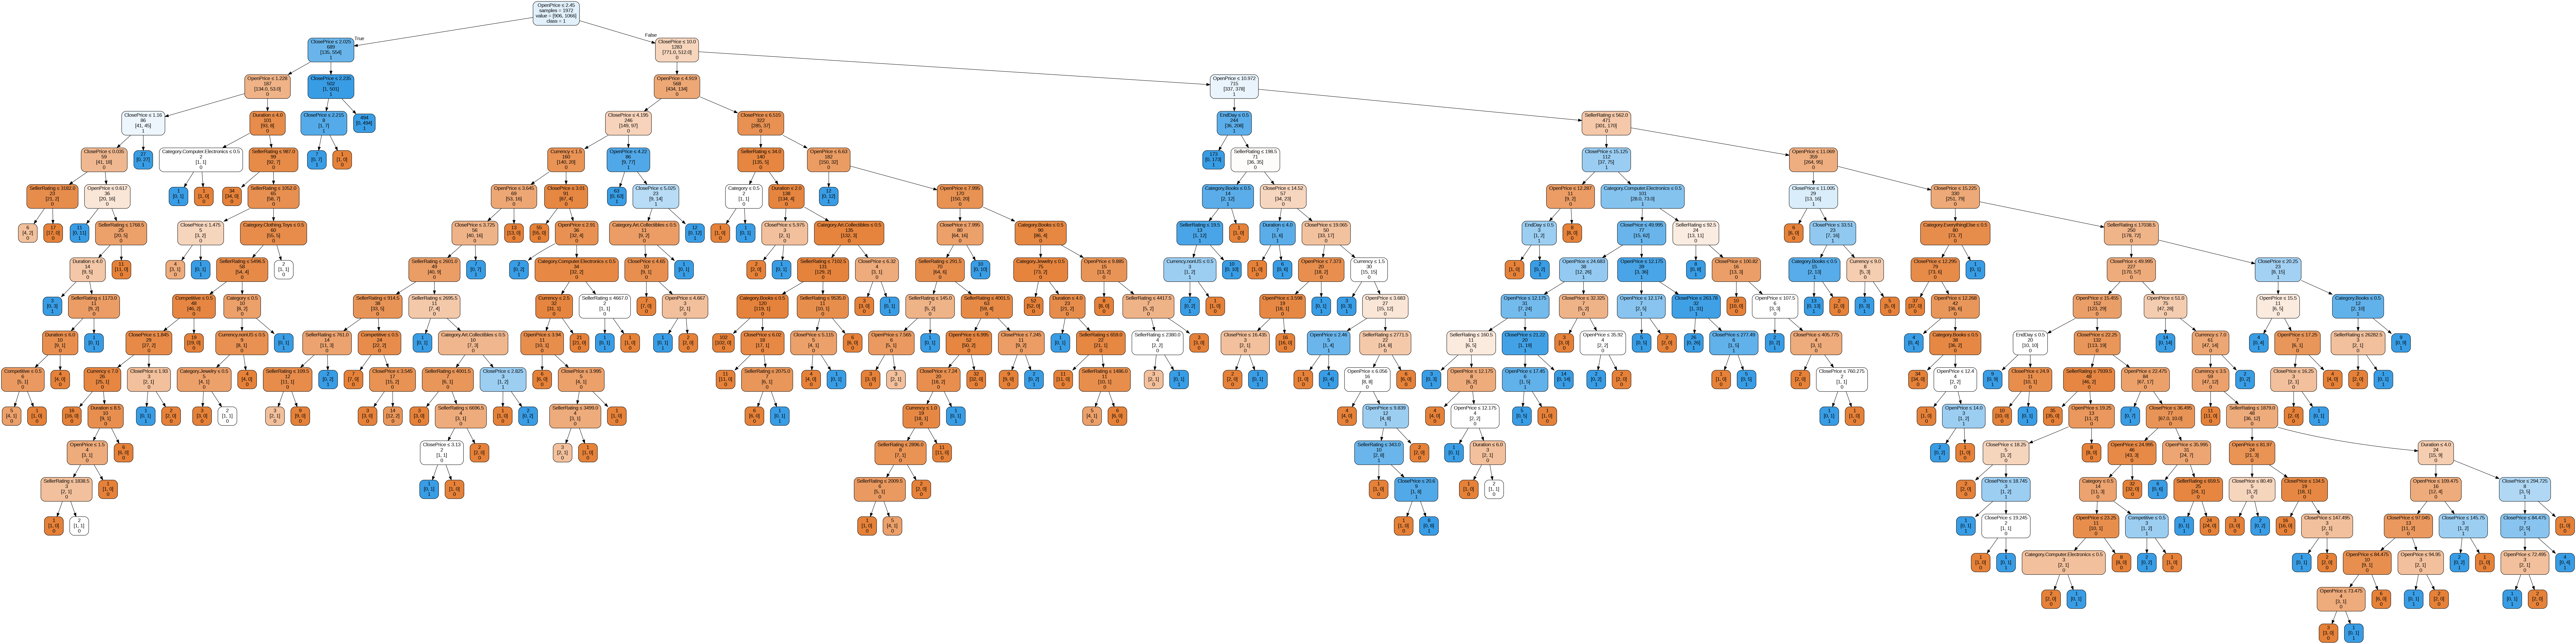

In [ ]:
plotDecisionTree(classTree, feature_names=ebay_df.columns[:19], class_names=classTree.classes_)

In [ ]:
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

DecisionTreeClassifier()

In [ ]:
classificationSummary(train_y, fullClassTree.predict(train_X))

Confusion Matrix (Accuracy 0.9920)

       Prediction
Actual   0   1
     0 634   0
     1  11 735


In [ ]:
classificationSummary(test_y, fullClassTree.predict(test_X))

Confusion Matrix (Accuracy 0.8851)

       Prediction
Actual   0   1
     0 245  27
     1  41 279


In [ ]:
smallClassTree = DecisionTreeClassifier(random_state=0, max_depth=4)
smallClassTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=4, random_state=0)

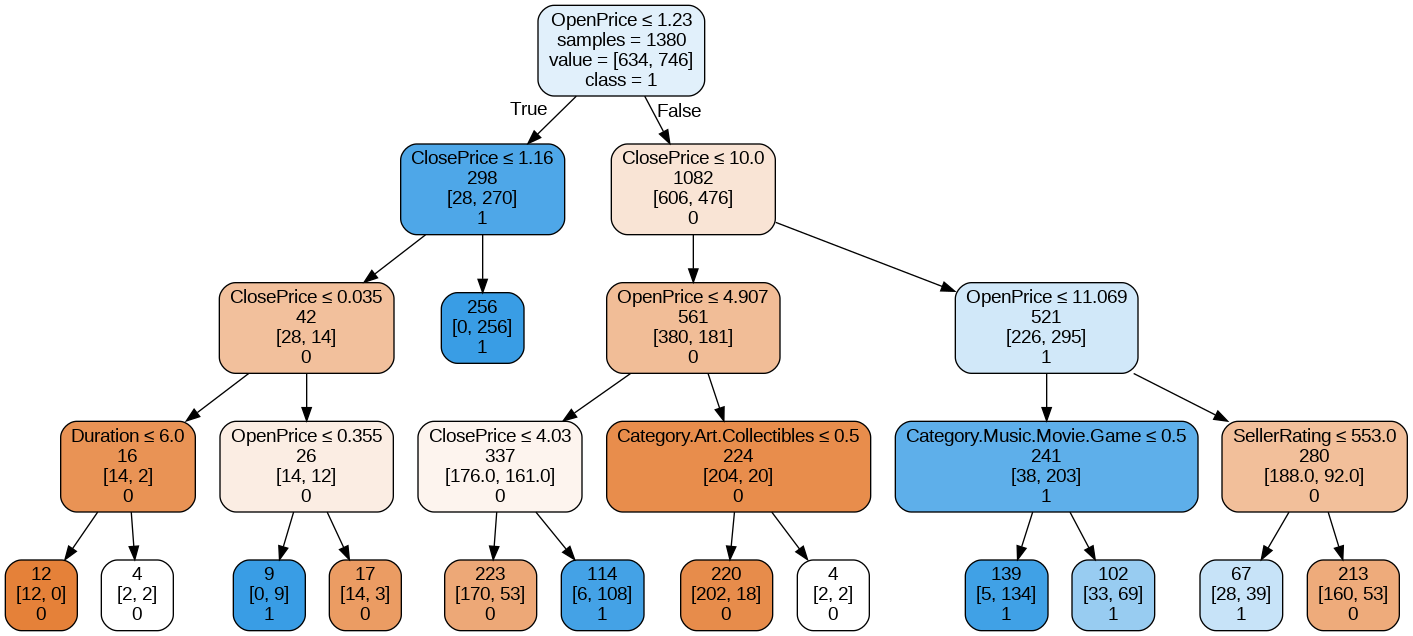

In [ ]:
plotDecisionTree(smallClassTree, feature_names=ebay_df.columns[:19], class_names=smallClassTree.classes_)

In [ ]:
classificationSummary(train_y, smallClassTree.predict(train_X))

Confusion Matrix (Accuracy 0.8529)

       Prediction
Actual   0   1
     0 562  72
     1 131 615


In [ ]:
classificationSummary(test_y, smallClassTree.predict(test_X))

Confusion Matrix (Accuracy 0.8463)

       Prediction
Actual   0   1
     0 249  23
     1  68 252


In [ ]:
regressionSummary(train_y, smallClassTree.predict(train_X))
regressionSummary(test_y, smallClassTree.predict(test_X))


Regression statistics

               Mean Error (ME) : 0.0428
Root Mean Squared Error (RMSE) : 0.3835
     Mean Absolute Error (MAE) : 0.1471

Regression statistics

               Mean Error (ME) : 0.0760
Root Mean Squared Error (RMSE) : 0.3921
     Mean Absolute Error (MAE) : 0.1537


In [ ]:
#Finding the Decision Rules for the Decision Tree with a Max Depth of 4

from sklearn.tree import export_text
print(export_text(fullClassTree, feature_names=list(ebay_df.columns[:19])))

|--- OpenPrice <= 1.23
|   |--- ClosePrice <= 1.16
|   |   |--- ClosePrice <= 0.03
|   |   |   |--- SellerRating <= 3182.00
|   |   |   |   |--- class: 0
|   |   |   |--- SellerRating >  3182.00
|   |   |   |   |--- class: 0
|   |   |--- ClosePrice >  0.03
|   |   |   |--- OpenPrice <= 0.35
|   |   |   |   |--- class: 1
|   |   |   |--- OpenPrice >  0.35
|   |   |   |   |--- SellerRating <= 935.00
|   |   |   |   |   |--- Duration <= 4.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Duration >  4.00
|   |   |   |   |   |   |--- Currency <= 7.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Currency >  7.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- SellerRating >  935.00
|   |   |   |   |   |--- class: 0
|   |--- ClosePrice >  1.16
|   |   |--- class: 1
|--- OpenPrice >  1.23
|   |--- ClosePrice <= 10.00
|   |   |--- OpenPrice <= 4.91
|   |   |   |--- ClosePrice <= 4.03
|   |   |   |   |--- OpenPrice <= 2.45
|   |   |   |  

In [ ]:
#Running a Random Forest Model

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
classificationSummary(train_y, rf.predict(train_X))

Confusion Matrix (Accuracy 0.9920)

       Prediction
Actual   0   1
     0 633   1
     1  10 736


In [ ]:
classificationSummary(test_y, rf.predict(test_X))

Confusion Matrix (Accuracy 0.8750)

       Prediction
Actual   0   1
     0 251  21
     1  53 267
